outliers


In [1]:
import pandas as pd

# Step 1: Load the dataset
data = pd.read_csv('data.csv')

# Step 2: Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Step 3: Find outliers using the IQR method for each numeric column
outliers_dict = {}

for column in numeric_columns:
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Store the outliers for this column
    outliers_dict[column] = outliers

# Step 4: Print outliers
for column, outliers in outliers_dict.items():
    print(f"Outliers in '{column}' column:")
    print(outliers)
    print("\n")

# Optionally, if you want to see how many outliers there are in each column:
for column, outliers in outliers_dict.items():
    print(f"Number of outliers in '{column}' column: {len(outliers)}")


Outliers in 'hieght' column:
Empty DataFrame
Columns: [hieght, weight, age, gpa, lpa]
Index: []


Outliers in 'weight' column:
Empty DataFrame
Columns: [hieght, weight, age, gpa, lpa]
Index: []


Outliers in 'age' column:
   hieght  weight  age   gpa   lpa
6   123.0    39.0   14  7.56  15.0
7   145.0     NaN   12  7.52  13.0


Outliers in 'gpa' column:
    hieght  weight  age  gpa  lpa
13   171.0    88.0   19  5.5  4.0


Outliers in 'lpa' column:
Empty DataFrame
Columns: [hieght, weight, age, gpa, lpa]
Index: []


Number of outliers in 'hieght' column: 0
Number of outliers in 'weight' column: 0
Number of outliers in 'age' column: 2
Number of outliers in 'gpa' column: 1
Number of outliers in 'lpa' column: 0


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Replace missing values in each numeric column with the median
for column in numeric_columns:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# Print the first 10 rows of the dataset to verify the changes
print(data.head(15))


    hieght  weight  age    gpa   lpa
0    166.0    76.0   19  6.230   3.0
1    166.0    63.0   18  7.880   9.0
2    181.0    53.0   17  8.330  14.0
3    155.0    69.0   19  7.900  25.0
4    169.0    63.0   19  8.328  12.0
5    166.0    75.0   16  7.920  10.0
6    123.0    39.0   14  7.560  15.0
7    145.0    63.0   12  7.520  13.0
8    123.0    89.0   20  7.780  14.0
9    166.0    63.0   21  7.900  25.0
10   153.0    53.0   20  9.560  45.0
11   187.0    59.0   19  8.890  29.0
12   196.0    46.0   18  9.440  15.0
13   171.0    88.0   19  5.500   4.0


C:\Users\91912\AppData\Local\Temp\ipykernel_7248\3264972792.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(median_value, inplace=True)
C:\Users\91912\AppData\Local\Temp\ipykernel_7248\3264972792.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

# Replace missing values in all columns with the value from the previous row (forward fill)
data.fillna(method='ffill', inplace=True)

# Print the first 10 rows of the dataset to verify the changes
print(data.head(10))


   hieght  weight  age    gpa   lpa
0   166.0    76.0   19  6.230   3.0
1   166.0    76.0   18  7.880   9.0
2   181.0    53.0   17  8.330   9.0
3   155.0    69.0   19  8.330  25.0
4   169.0    69.0   19  8.328  12.0
5   169.0    75.0   16  7.920  10.0
6   123.0    39.0   14  7.560  15.0
7   145.0    39.0   12  7.520  13.0
8   123.0    89.0   20  7.780  13.0
9   123.0    63.0   21  7.780  25.0


C:\Users\91912\AppData\Local\Temp\ipykernel_7248\792351607.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

# Replace missing values in all columns with the value from the next row (backward fill)
data.fillna(method='bfill', inplace=True)

# Print the first 10 rows of the dataset to verify the changes
print(data.head(15))


    hieght  weight  age    gpa   lpa
0    166.0    76.0   19  6.230   3.0
1    181.0    53.0   18  7.880   9.0
2    181.0    53.0   17  8.330  25.0
3    155.0    69.0   19  8.328  25.0
4    169.0    75.0   19  8.328  12.0
5    123.0    75.0   16  7.920  10.0
6    123.0    39.0   14  7.560  15.0
7    145.0    89.0   12  7.520  13.0
8    123.0    89.0   20  7.780  25.0
9    153.0    63.0   21  9.560  25.0
10   153.0    53.0   20  9.560  45.0
11   187.0    59.0   19  8.890  29.0
12   196.0    46.0   18  9.440  15.0
13   171.0    88.0   19  5.500   4.0


C:\Users\91912\AppData\Local\Temp\ipykernel_7248\200599521.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

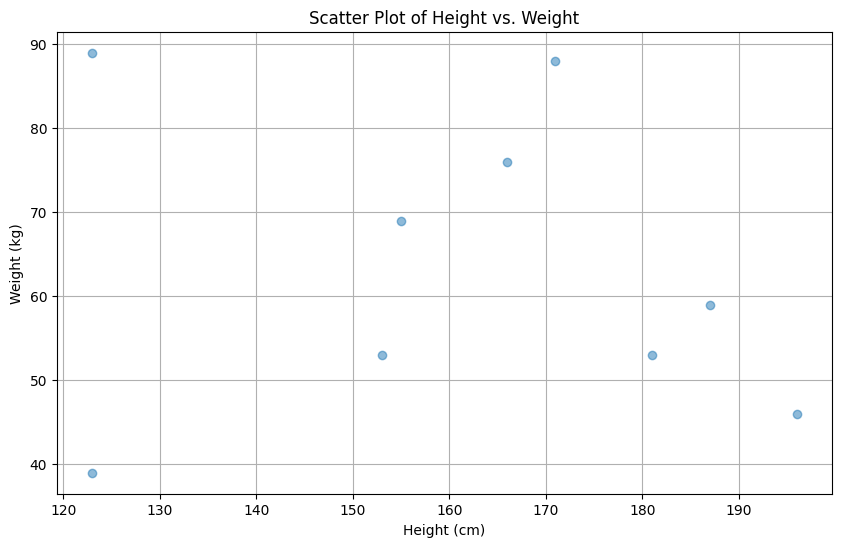

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['hieght'], data['weight'], alpha=0.5)
plt.title('Scatter Plot of Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid()
plt.show()

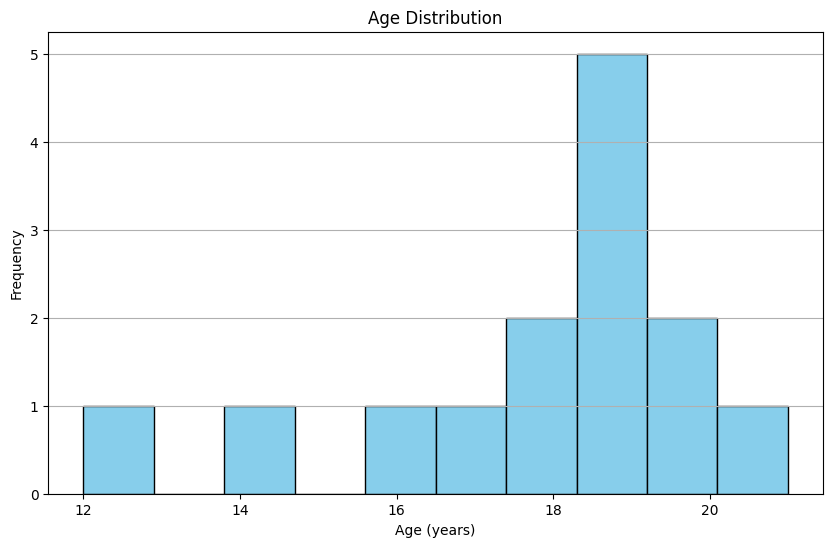

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

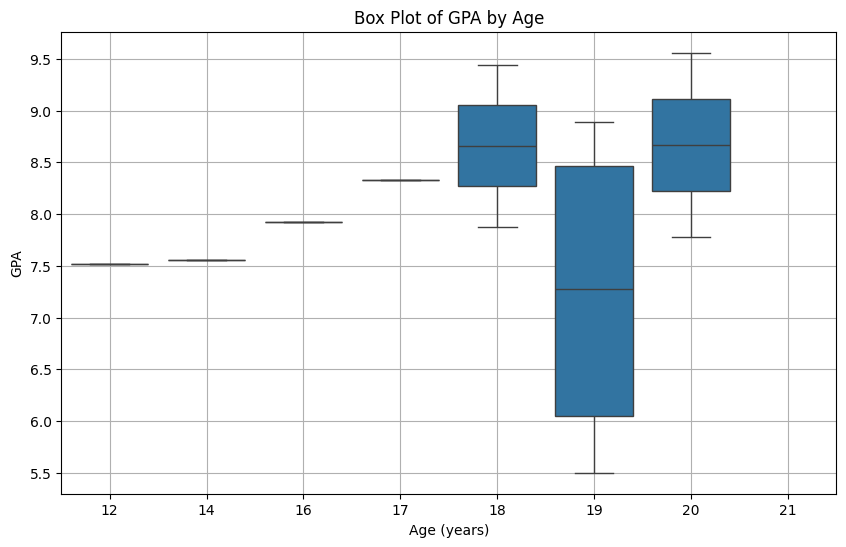

In [10]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='gpa', data=data)
plt.title('Box Plot of GPA by Age')
plt.xlabel('Age (years)')
plt.ylabel('GPA')
plt.grid()
plt.show()

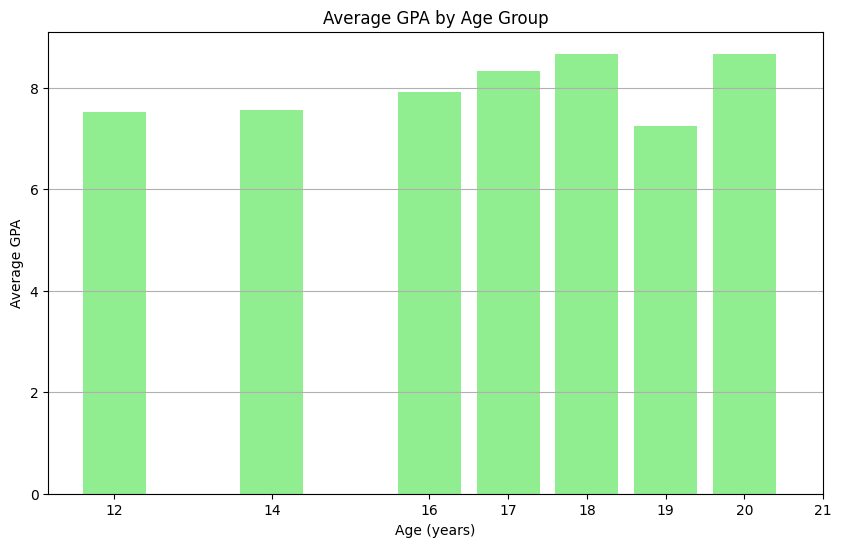

In [11]:
age_groups = data.groupby('age')['gpa'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(age_groups['age'], age_groups['gpa'], color='lightgreen')
plt.title('Average GPA by Age Group')
plt.xlabel('Age (years)')
plt.ylabel('Average GPA')
plt.xticks(age_groups['age'])
plt.grid(axis='y')
plt.show()

<Figure size 1200x1000 with 0 Axes>

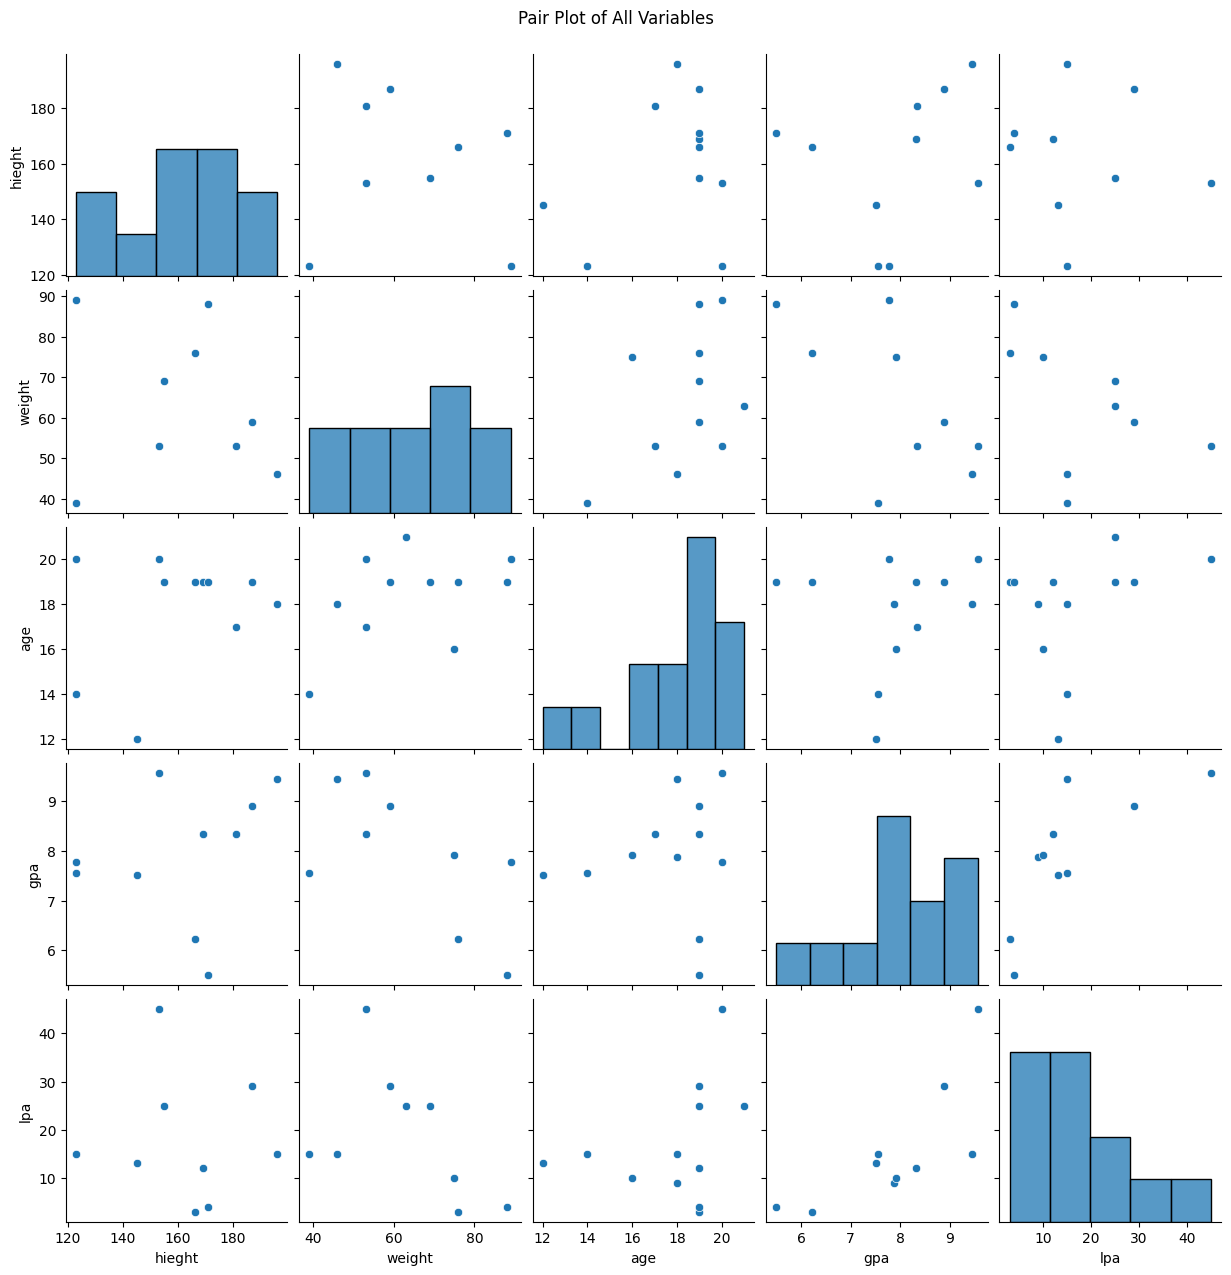

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.pairplot(data)
plt.suptitle('Pair Plot of All Variables', y=1.02)
plt.show()

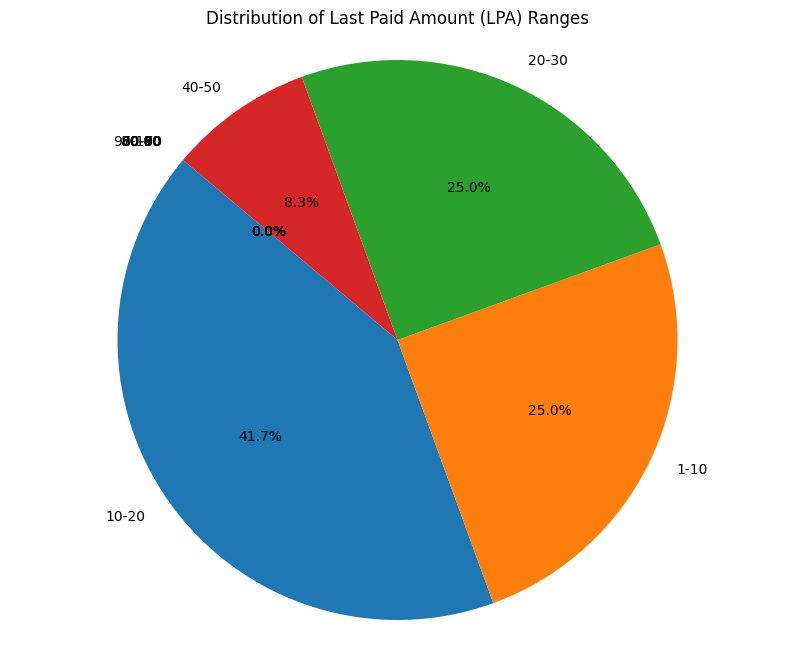

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv')

# Define the bins and labels for LPA ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust according to your needs
labels = ['1-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column for LPA ranges
data['lpa_range'] = pd.cut(data['lpa'], bins=bins, labels=labels, right=False)

# Count occurrences in each LPA range
lpa_counts = data['lpa_range'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(lpa_counts, labels=lpa_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Last Paid Amount (LPA) Ranges')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

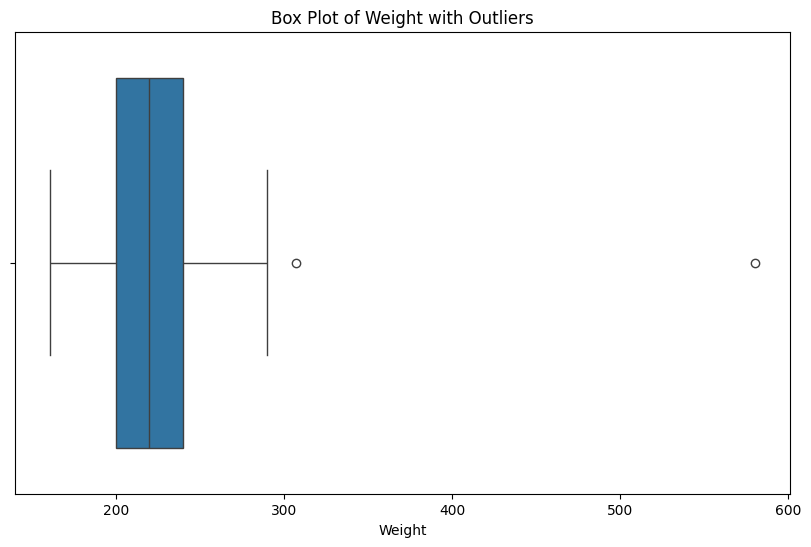

Outliers in the 'Weight' column:
               Name                    Team  Number Position Age  Height  \
0     Avery Bradley          Boston Celtics     0.0       PG  25  06-Feb   
405  Nikola Pekovic  Minnesota Timberwolves    14.0        C  30  06-Nov   

     Weight College      Salary  
0     580.0   Texas   7730337.0  
405   307.0     NaN  12100000.0  


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('nba.csv')
def find_outliers(df,coloumn):
    q1 = df[coloumn].quantile(0.25)
    q3 = df[coloumn].quantile(0.75)
    iqr = q3 - q1
    lowerbound = q1 - 1.5 * iqr
    upperbound = q3 + 1.5 * iqr
    outliers = df[(df[coloumn] < lowerbound) | (df[coloumn] > upperbound)]
    return outliers

outliers = find_outliers(data, 'Weight')

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Weight'])
plt.title('Box Plot of Weight with Outliers')
plt.show()

# Optionally, print the outliers
print("Outliers in the 'Weight' column:")
print(outliers)


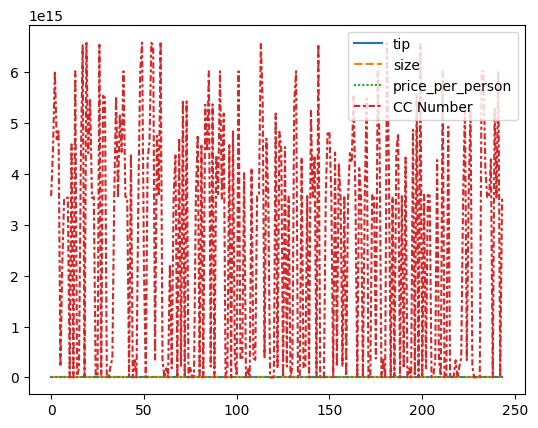

In [18]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
 
 
# reading the database
data = pd.read_csv("tips.csv")
 
# using only data attribute
sns.lineplot(data=data.drop(['total_bill'], axis=1))
plt.show()

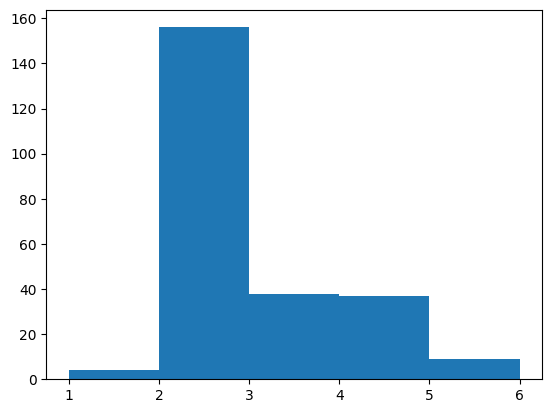

In [19]:
plt.hist(data['size'], bins=5)
plt.show()

C:\Users\91912\AppData\Local\Temp\ipykernel_7248\2370038347.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['size'])


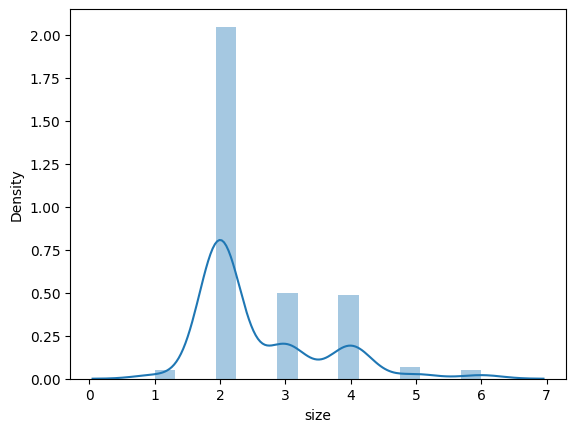

In [21]:
sns.distplot(data['size']) 
plt.show()

In [22]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

# Specify the column to sort by (replace 'YourColumnName' with the actual column name)
column_to_sort_by = 'lpa'

# Check if the column exists in the dataset
if column_to_sort_by in data.columns:
    # Sort the dataset by the specified column
    sorted_data = data.sort_values(by=column_to_sort_by)

    # Calculate the mean of each column
    column_means = sorted_data.mean()

    # Print the sorted dataset
    print("Sorted dataset:")
    print(sorted_data.head(10))  # Print the first 10 rows for preview

    # Print the means of each column
    print("\nColumn-wise means:")
    print(column_means)
else:
    print(f"Column '{column_to_sort_by}' does not exist in the dataset.")


Sorted dataset:
    hieght  weight  age    gpa   lpa
0    166.0    76.0   19  6.230   3.0
13   171.0    88.0   19  5.500   4.0
1      NaN     NaN   18  7.880   9.0
5      NaN    75.0   16  7.920  10.0
4    169.0     NaN   19  8.328  12.0
7    145.0     NaN   12  7.520  13.0
6    123.0    39.0   14  7.560  15.0
12   196.0    46.0   18  9.440  15.0
3    155.0    69.0   19    NaN  25.0
9      NaN    63.0   21    NaN  25.0

Column-wise means:
hieght    160.818182
weight     64.545455
age        17.928571
gpa         7.911500
lpa        17.083333
dtype: float64


In [23]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

# Drop columns with any null values
data_no_null_cols = data.dropna(axis=1)

# Print the dataset after dropping null columns
print("Dataset after dropping columns with null values:")
print(data_no_null_cols.head(10))  # Print the first 10 rows for preview


Dataset after dropping columns with null values:
   age
0   19
1   18
2   17
3   19
4   19
5   16
6   14
7   12
8   20
9   21


In [24]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

# Drop rows with any null values
data_no_null_rows = data.dropna(axis=0)

# Print the dataset after dropping null rows
print("Dataset after dropping rows with null values:")
print(data_no_null_rows.head(10))  # Print the first 10 rows for preview


Dataset after dropping rows with null values:
    hieght  weight  age   gpa   lpa
0    166.0    76.0   19  6.23   3.0
6    123.0    39.0   14  7.56  15.0
10   153.0    53.0   20  9.56  45.0
11   187.0    59.0   19  8.89  29.0
12   196.0    46.0   18  9.44  15.0
13   171.0    88.0   19  5.50   4.0


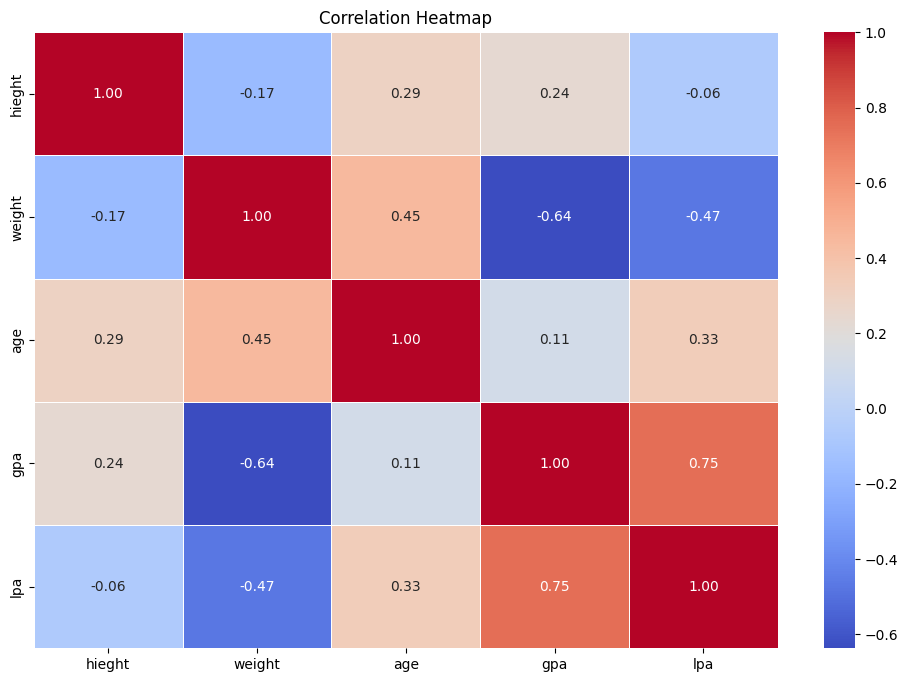

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
